In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import datetime
from pyramid.arima import auto_arima

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/alext234/coronavirus-stats/master/data/who-global-cases.csv',index_col=0)

In [3]:
del data['report_url']

In [4]:
data = data[~data.index.duplicated(keep='last')]

In [5]:
data.describe()

,global_cases
count,6.800000e+01
mean,1.919129e+05
std,2.529281e+05
min,2.798000e+03
25%,4.654050e+04
50%,8.627000e+04
75%,1.821158e+05
max,1.051635e+06


In [6]:
data.head()

,global_cases
date,
2020-01-27,2798
2020-01-28,4593
2020-01-29,6065
2020-01-30,7818
2020-01-31,9826


In [7]:
data.tail()

,global_cases
date,
2020-03-31,750890
2020-04-01,823626
2020-04-02,896450
2020-04-03,972640
2020-04-04,1051635


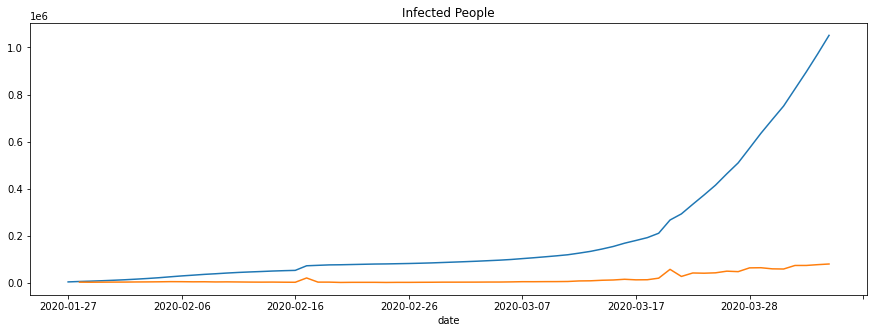

In [8]:
data.global_cases.plot(figsize=(15, 5), title='Infected People')
(data.global_cases - data.global_cases.shift(1)).plot(figsize=(15, 5))

In [9]:
predicted_days = 5
firstPredictionDay = datetime.datetime.strptime(data.index[-1], '%Y-%m-%d') + datetime.timedelta(days = 1)

In [10]:
stepwise_model = auto_arima(data.global_cases,
                            seasonal=False,
                            trace=True,
                            error_action='ignore',  
                            suppress_warnings=True, 
                            stepwise=True)

Fit ARIMA: order=(2, 2, 2); AIC=1349.874, BIC=1363.012, Fit time=3.041 seconds
Fit ARIMA: order=(0, 2, 0); AIC=1369.848, BIC=1374.227, Fit time=0.022 seconds
Fit ARIMA: order=(1, 2, 0); AIC=1355.360, BIC=1361.929, Fit time=0.186 seconds
Fit ARIMA: order=(0, 2, 1); AIC=1355.262, BIC=1361.831, Fit time=0.590 seconds
Fit ARIMA: order=(1, 2, 2); AIC=1347.881, BIC=1358.829, Fit time=2.623 seconds
Fit ARIMA: order=(1, 2, 1); AIC=1355.671, BIC=1364.430, Fit time=1.612 seconds
Fit ARIMA: order=(1, 2, 3); AIC=1359.106, BIC=1372.244, Fit time=6.124 seconds
Fit ARIMA: order=(2, 2, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 2, 2); AIC=1355.104, BIC=1363.862, Fit time=0.312 seconds
Total fit time: 15.659 seconds


In [11]:
stepwise_model.aic()

1347.881157394829

In [12]:
stepwise_model.fit(data.global_cases)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 2, 2),
      out_of_sample_size=0, scoring='mse', scoring_args={}, seasonal_order=None,
      solver='lbfgs', start_params=None, suppress_warnings=True,
      transparams=True, trend='c')

In [13]:
future_forecast = stepwise_model.predict(n_periods=predicted_days)

In [14]:
for x in range (0, predicted_days):
    print(str(firstPredictionDay + datetime.timedelta(days = x))[0:10] + " - " +str(int(future_forecast[x])))

2020-04-05 - 1132597
2020-04-06 - 1216429
2020-04-07 - 1303031
2020-04-08 - 1392311
2020-04-09 - 1484180
